In [112]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [113]:
# Функция для создания маски цвета на изображении для заданного rgb-цвета.
def rgb_mask(image, rgb=(0, 0, 0), tolerance=8):
    return np.prod(abs(image - rgb) < tolerance, 2).astype(bool)

In [114]:
# Палитра rgb-цветов, для которой необходимо составить комплексную маску
palette = {'lightblue': [207, 252, 255],
           'pink': [247, 186, 226],
           'purple': [216, 186, 238],
           'lightgreen': [175, 255, 158],
           'green': [102, 210, 110]}

In [115]:
filename = '2fuse/20180326-ohot.jpg'
scheme = plt.imread(filename)
h, w, c = scheme.shape

In [116]:
# Составляем комплексную маску
mask = np.zeros((h, w), dtype=bool)
for key, value in palette.items():
    mask += rgb_mask(scheme, value)

mask = mask.astype(bool)

In [117]:
def morphclosed(image, kernel_size=(3, 3)):
    kernel = np.ones(kernel_size,np.uint8)
    dilated = cv2.dilate(image.astype(np.float32), kernel)
    return cv2.erode(dilated.astype(np.float32), kernel)

In [119]:
from scipy.ndimage import binary_fill_holes

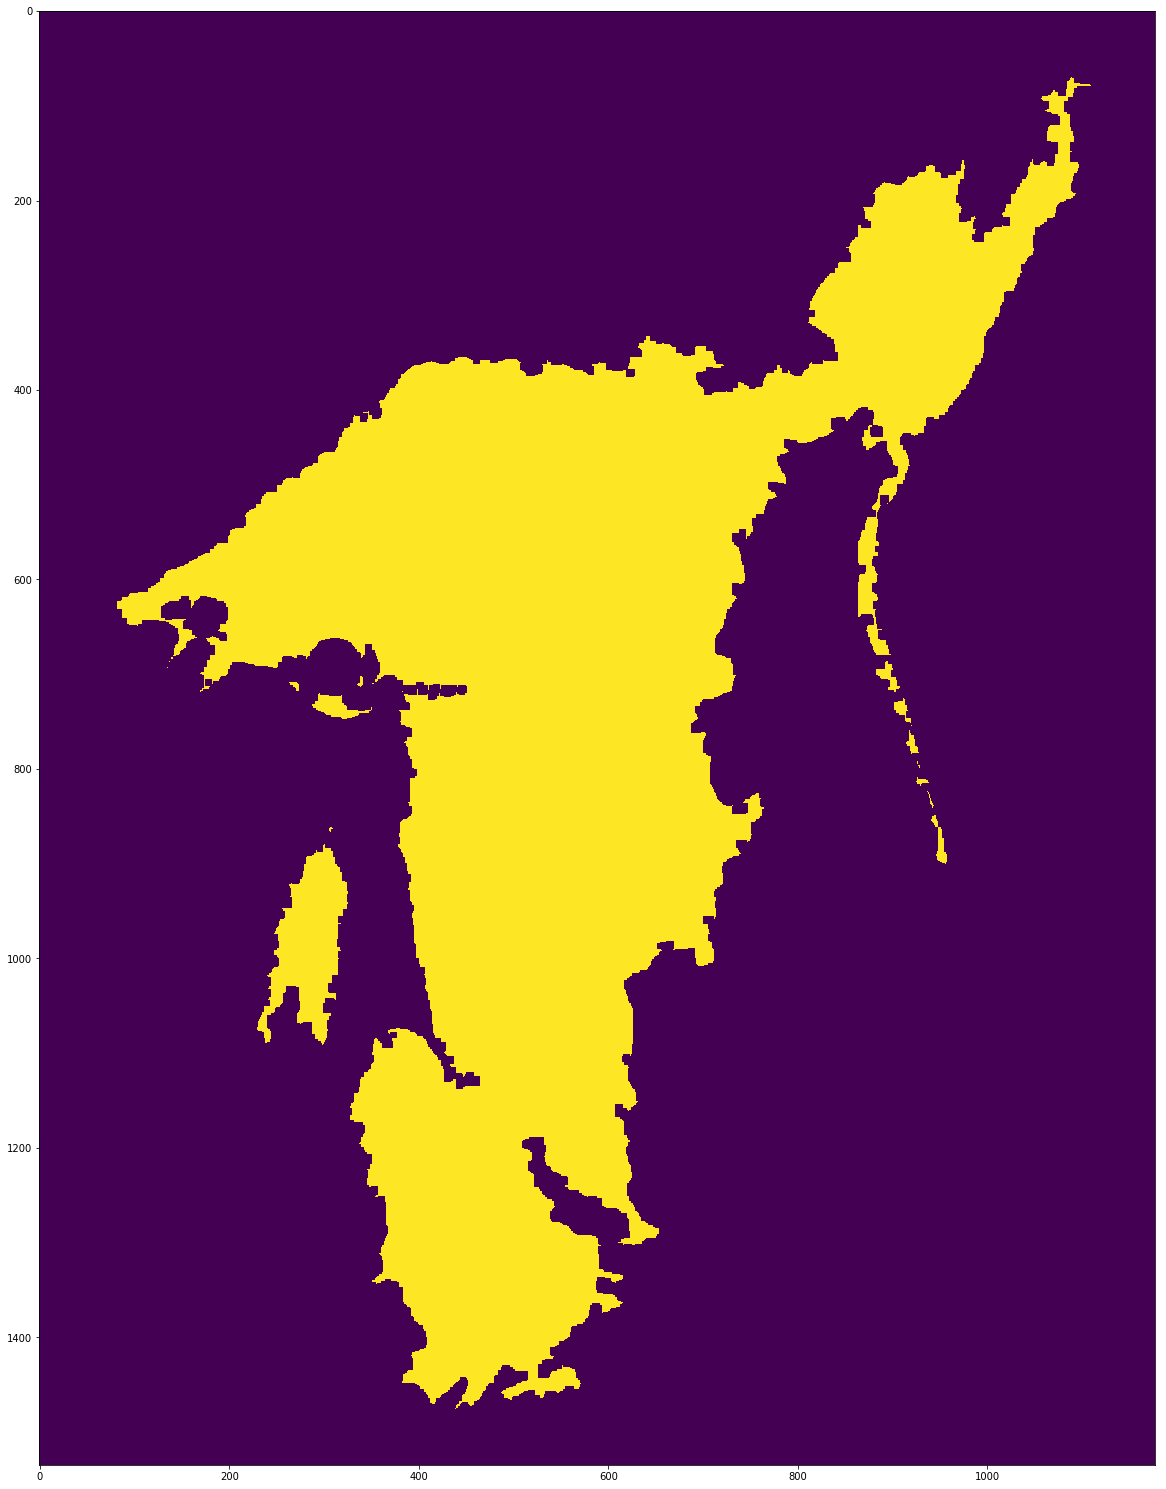

In [120]:
# todo: Морфологическое закрытие
mask_closed = morphclosed(mask, kernel_size=(7, 7))
plt.figure(figsize=(20, 50))
# убираем артефакты от легенды
mask_closed[1000:, 800:1000] = 0

mask_closed_wo_holes = binary_fill_holes(mask_closed)

plt.imshow(mask_closed_wo_holes)
# plt.imshow(mask_closed)


mask = mask_closed_wo_holes

In [121]:
# Спутниковый снимок
filename = '/Users/loki/PycharmProjects/ds-icedetection/data/collection/2015-02-05_03-34-58_NOAA 19_NOAA_20150206_133842__n90886.1_pro.png'
satimg = plt.imread(filename)

In [122]:
# Преобразуем "серый" спутниковый снимок в rgb-изображение с активным r-каналом.
satimg_r = satimg * np.array([1, 0, 0])
h, w, c = satimg_r.shape

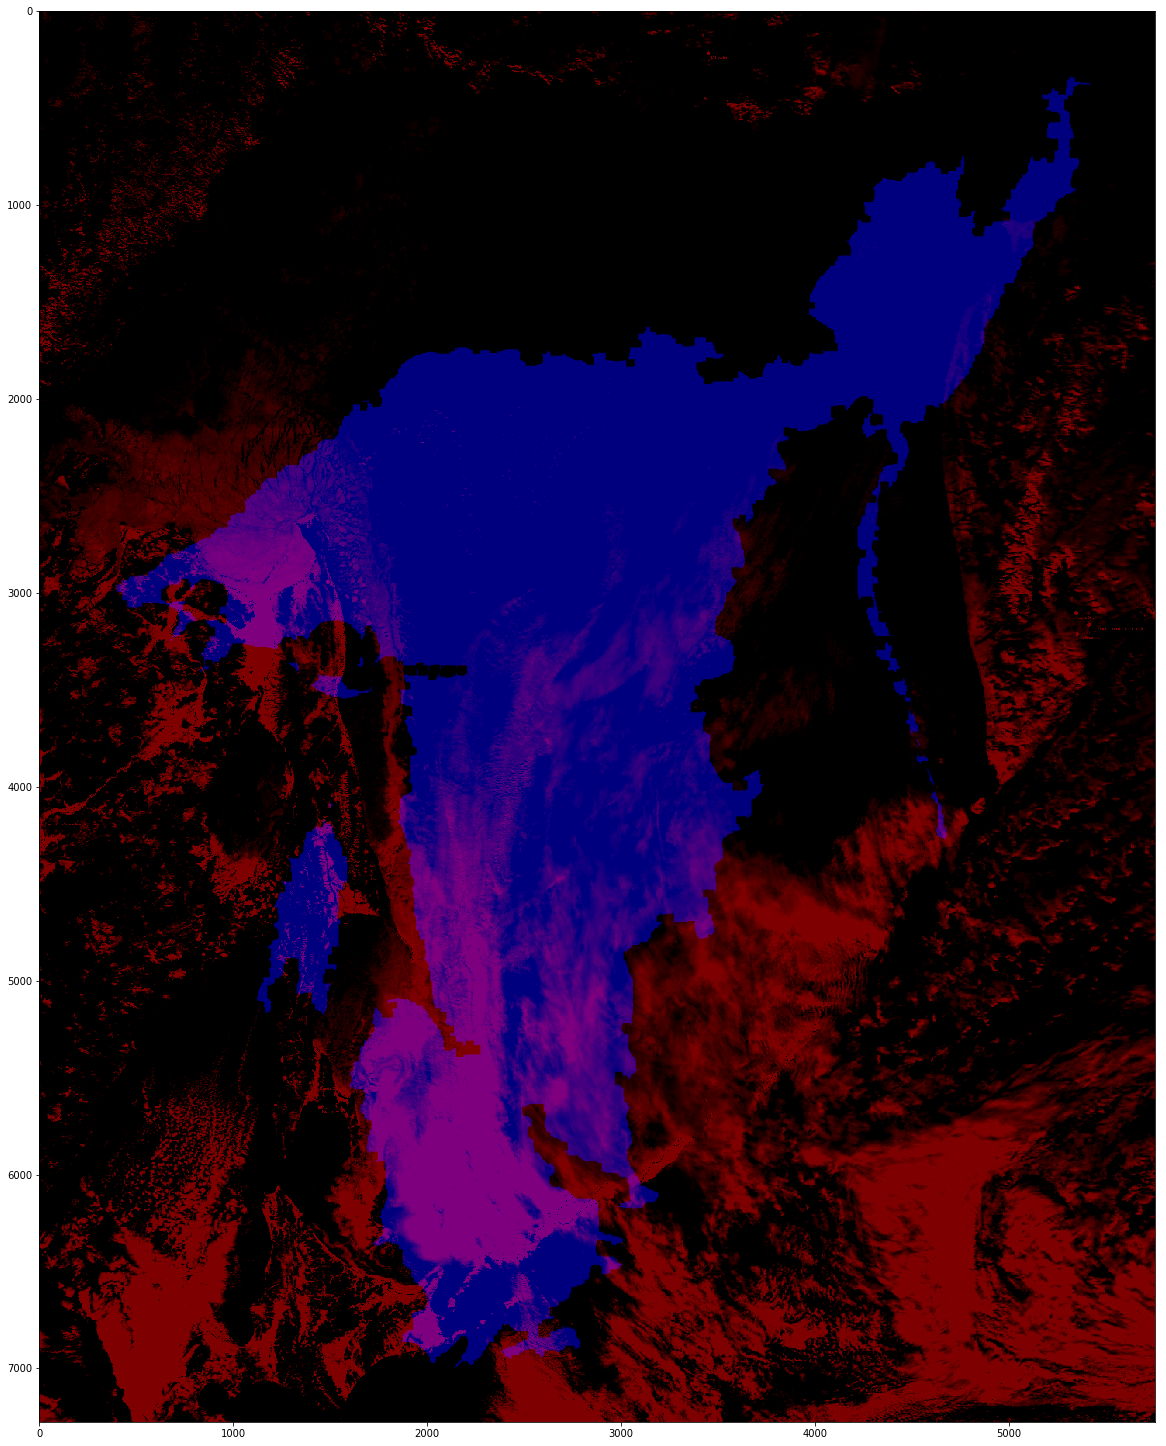

In [123]:
#
mask_resized = cv2.resize(mask.astype(np.float32), dsize=(w, h))
layer = cv2.cvtColor(mask_resized.astype(np.float32), cv2.COLOR_GRAY2RGB) * np.array([0, 0, 1], dtype=np.float32)
scheme_layer = layer.astype(np.float32)

result = cv2.addWeighted(satimg_r.astype(np.float32), 0.5, scheme_layer, 0.5, gamma=0)
#
plt.figure(figsize=(20,50))
plt.imshow(result)
plt.show()



In [124]:
# выделяем маску синего контура, контура суши.
contour = np.prod(satimg == np.array([0, 0, 1]), 2)

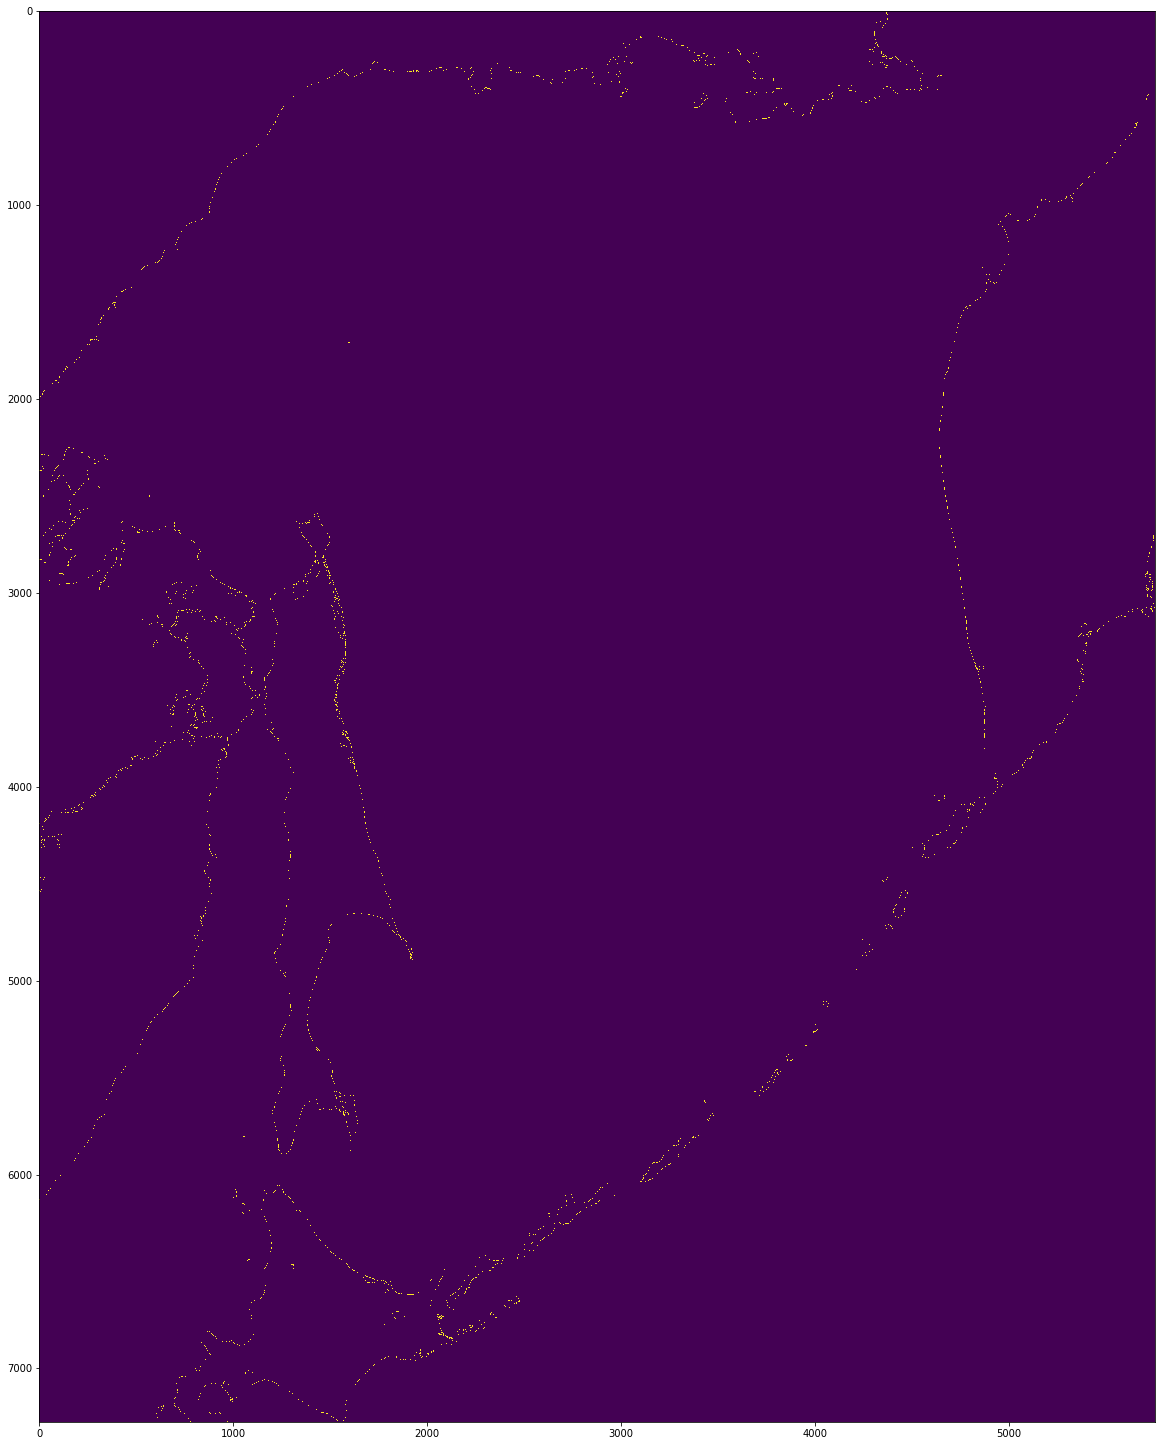

In [125]:
# Визуализируем контур
plt.figure(figsize=(20, 50))
plt.imshow(contour)

In [126]:
# Расширяем линию контура с помощью дилатации
kernel = np.ones((11,11),np.uint8)
dilated = cv2.dilate(contour.astype(np.float32), kernel)

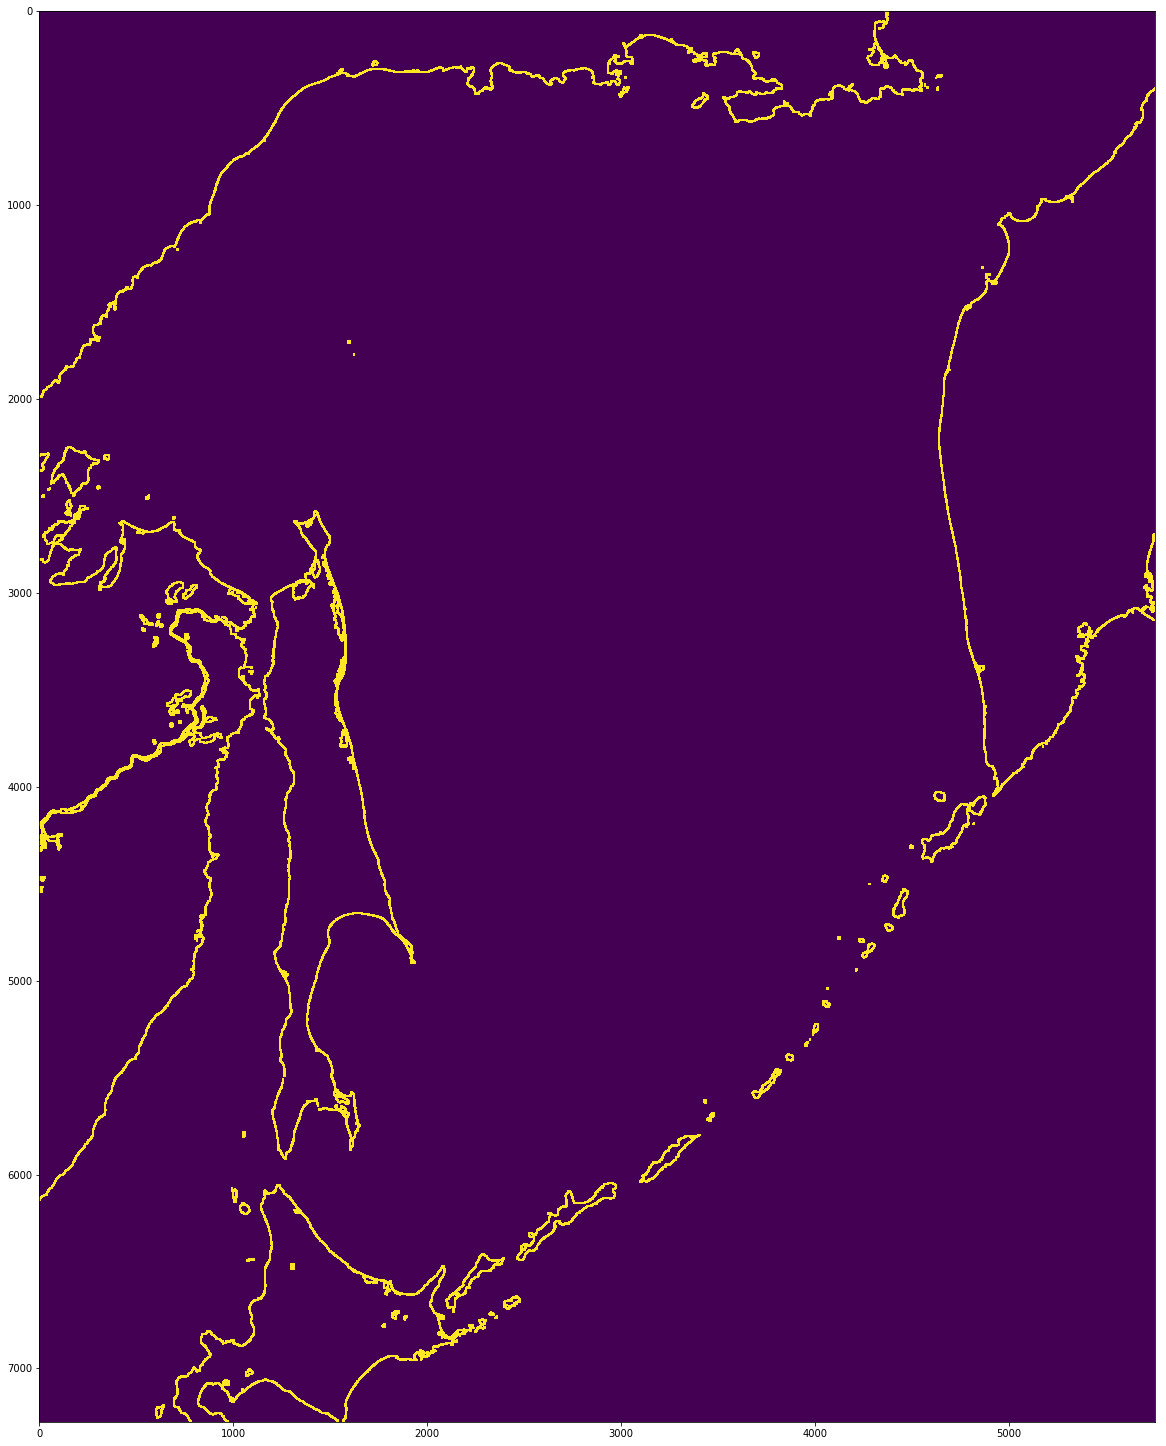

In [127]:
plt.figure(figsize=(20, 50))
plt.imshow(dilated)

In [158]:
# Преобразуем маску контура в rgb-маску с активным R-каналом.
layer = cv2.cvtColor(dilated.astype(np.float32), cv2.COLOR_GRAY2RGB) * np.array([1, 0, 0], dtype=np.float32)
layer = layer.astype(np.float32)

In [129]:
# Наносим маску контура на спутниковый снимок
satimg_enh = cv2.addWeighted(satimg, 0.5, layer, 0.5, gamma=0)

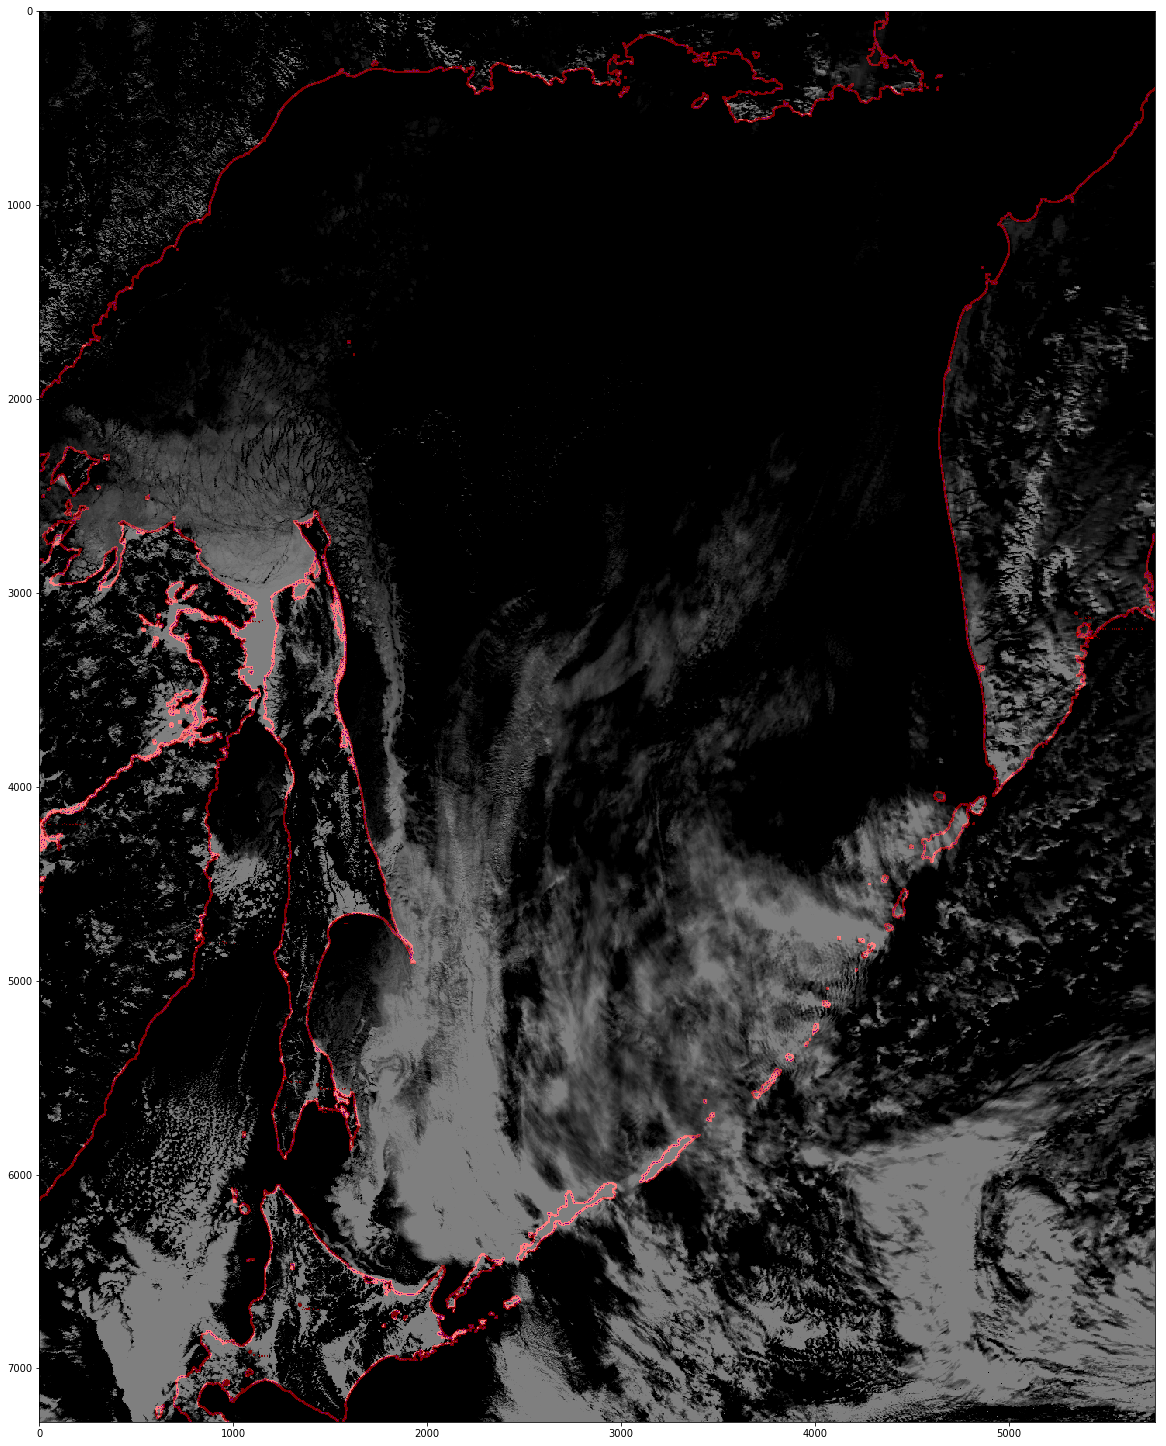

In [130]:
plt.figure(figsize=(20, 50))
plt.imshow(satimg_enh)

In [131]:
# Наносим маску схемы на спутниковый снимок
compl = cv2.addWeighted(satimg_enh, 0.5, scheme_layer, 0.5, gamma=0)

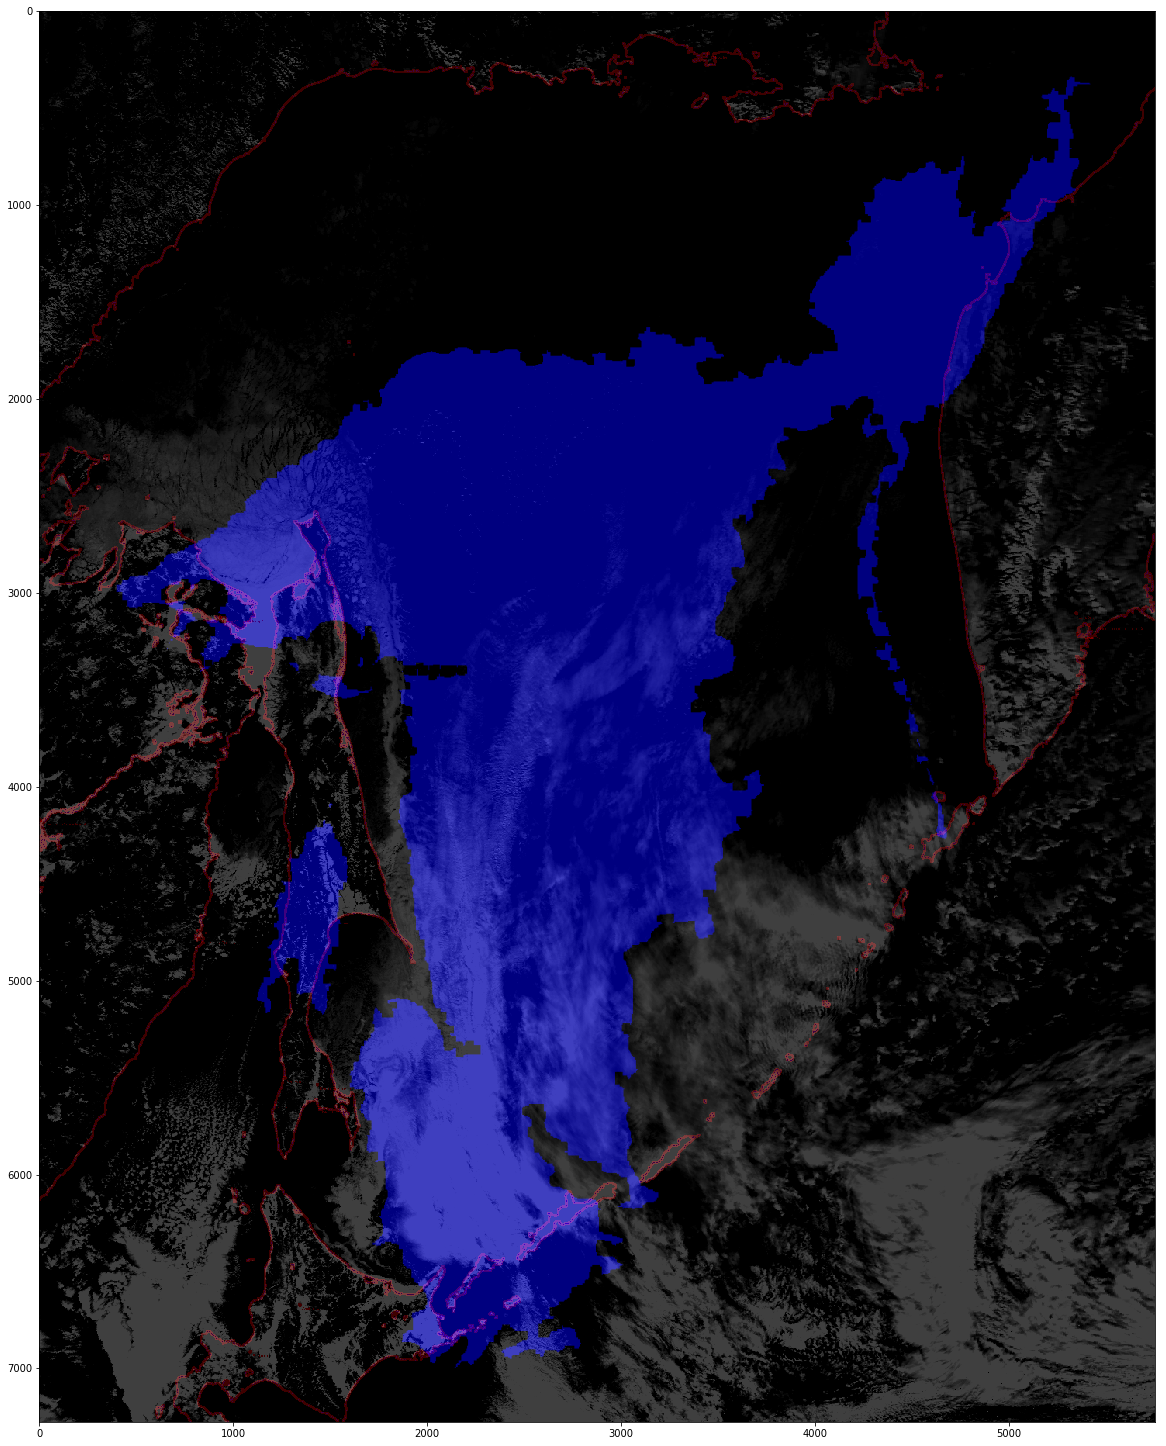

In [132]:
plt.figure(figsize=(20, 50))
plt.imshow(compl)

In [133]:
from glob import glob

In [134]:
png_list = glob('/Users/loki/PycharmProjects/ds-icedetection/data/collection2/*.png')

In [135]:
stack = np.zeros((h, w, len(png_list)))
for index, png_file in enumerate(png_list):
    image = plt.imread(png_file)[..., 0]
    stack[..., index] = image

In [136]:
# Попиксельный минимум для "батча" изображений
satimg_ench = np.min(stack, 2)

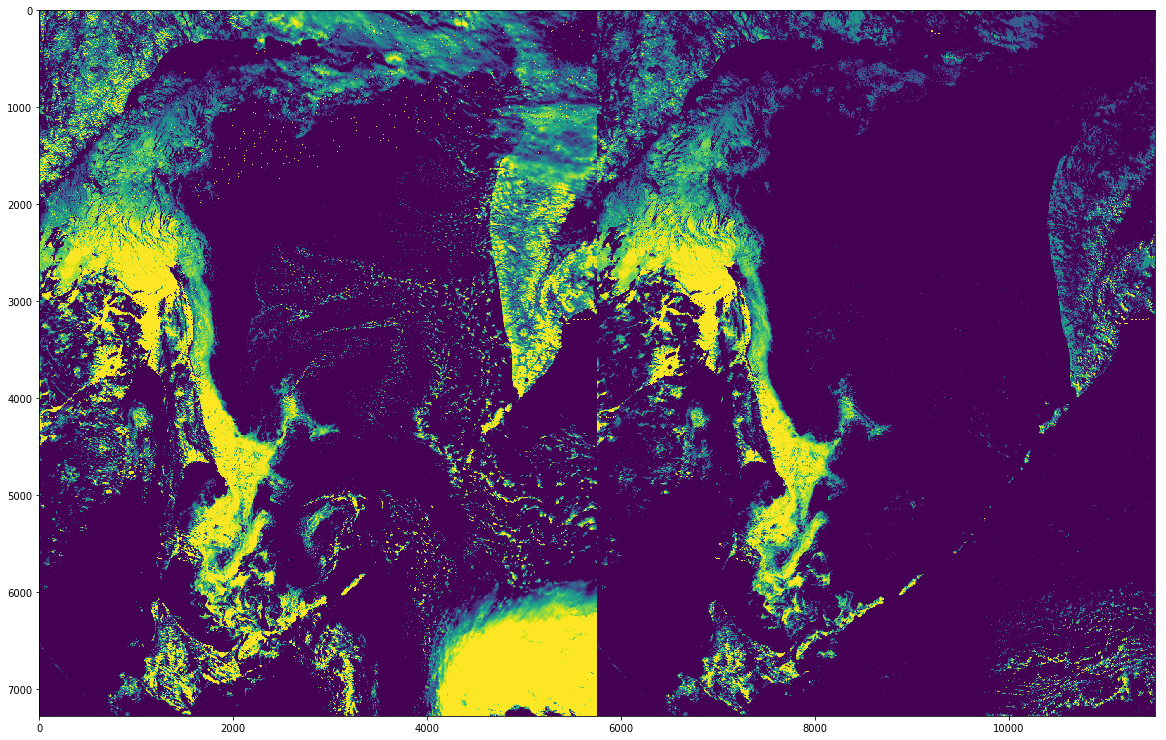

In [137]:
# Сравнение изображений: слева - одно из последовательности, справа = попиксельный минимум для серии из 3х изображений
plt.figure(figsize=(20, 50))
plt.imshow(np.hstack([plt.imread(png_list[0])[..., 0], satimg_ench]))

In [139]:
# Находим преобразование для двух наборов точек
points = [
[ 1011 , 951 ], [ 4925 , 4032 ],
[ 746 , 1323 ], [ 3353 , 5802 ],
[ 556 , 1460 ], [ 2465 , 6429 ],
[ 476 , 1466 ], [ 2081 , 6473 ],
[ 301 , 1363 ], [ 1233 , 6053 ],
[ 206 , 1515 ], [ 869 , 6809 ],
[ 128 , 1262 ], [ 333 , 5683 ],
[ 174 , 1207 ], [ 501 , 5397 ],
[ 279 , 1022 ], [ 921 , 4357 ],
[ 328 , 896 ], [ 1101 , 3613 ],
[ 322 , 1128 ], [ 1213 , 4858 ],
[ 313 , 1335 ], [ 1265 , 5917 ],
[ 346 , 1276 ], [ 1429 , 5918 ],
[ 382 , 1331 ], [ 1605 , 5870 ],
[ 460 , 1146 ], [ 1925 , 4906 ],
[ 400 , 726 ], [ 1425 , 2580 ],
[ 355 , 793 ], [ 1193 , 3020 ],
[ 280 , 719 ], [ 693 , 2632 ],
[ 224 , 736 ], [ 393 , 2764 ],
[ 167 , 753 ], [ 53 , 2940 ],
[ 336 , 484 ], [ 701 , 1213 ],
[ 451 , 384 ], [ 1561 , 313 ],
[ 546 , 406 ], [ 2256 , 421 ],
[ 756 , 395 ], [ 3837 , 389 ],
[ 856 , 375 ], [ 4553 , 313 ],
[ 943 , 470 ], [ 5005 , 1041 ],
[ 947 , 841 ], [ 4837 , 3380 ],
]

In [140]:
pointset_1 = points[0::2]
pointset_2 = points[1::2]

In [141]:
coeff = cv2.estimateRigidTransform(np.array(pointset_1).astype(np.float32), np.array(pointset_2).astype(np.float32), True)

In [142]:
coeff

array([[ 4.82812808e+00,  5.27234500e-01, -9.50180674e+02],
       [-2.06494416e-01,  5.24755633e+00, -1.04972932e+03]])

In [144]:
mask.shape

(1535, 1178)

In [151]:
mask_transformed = cv2.warpAffine(mask.astype(np.float32), coeff, dsize=satimg_ench.shape[::-1])

In [152]:
mask_transformed.max()

1.0

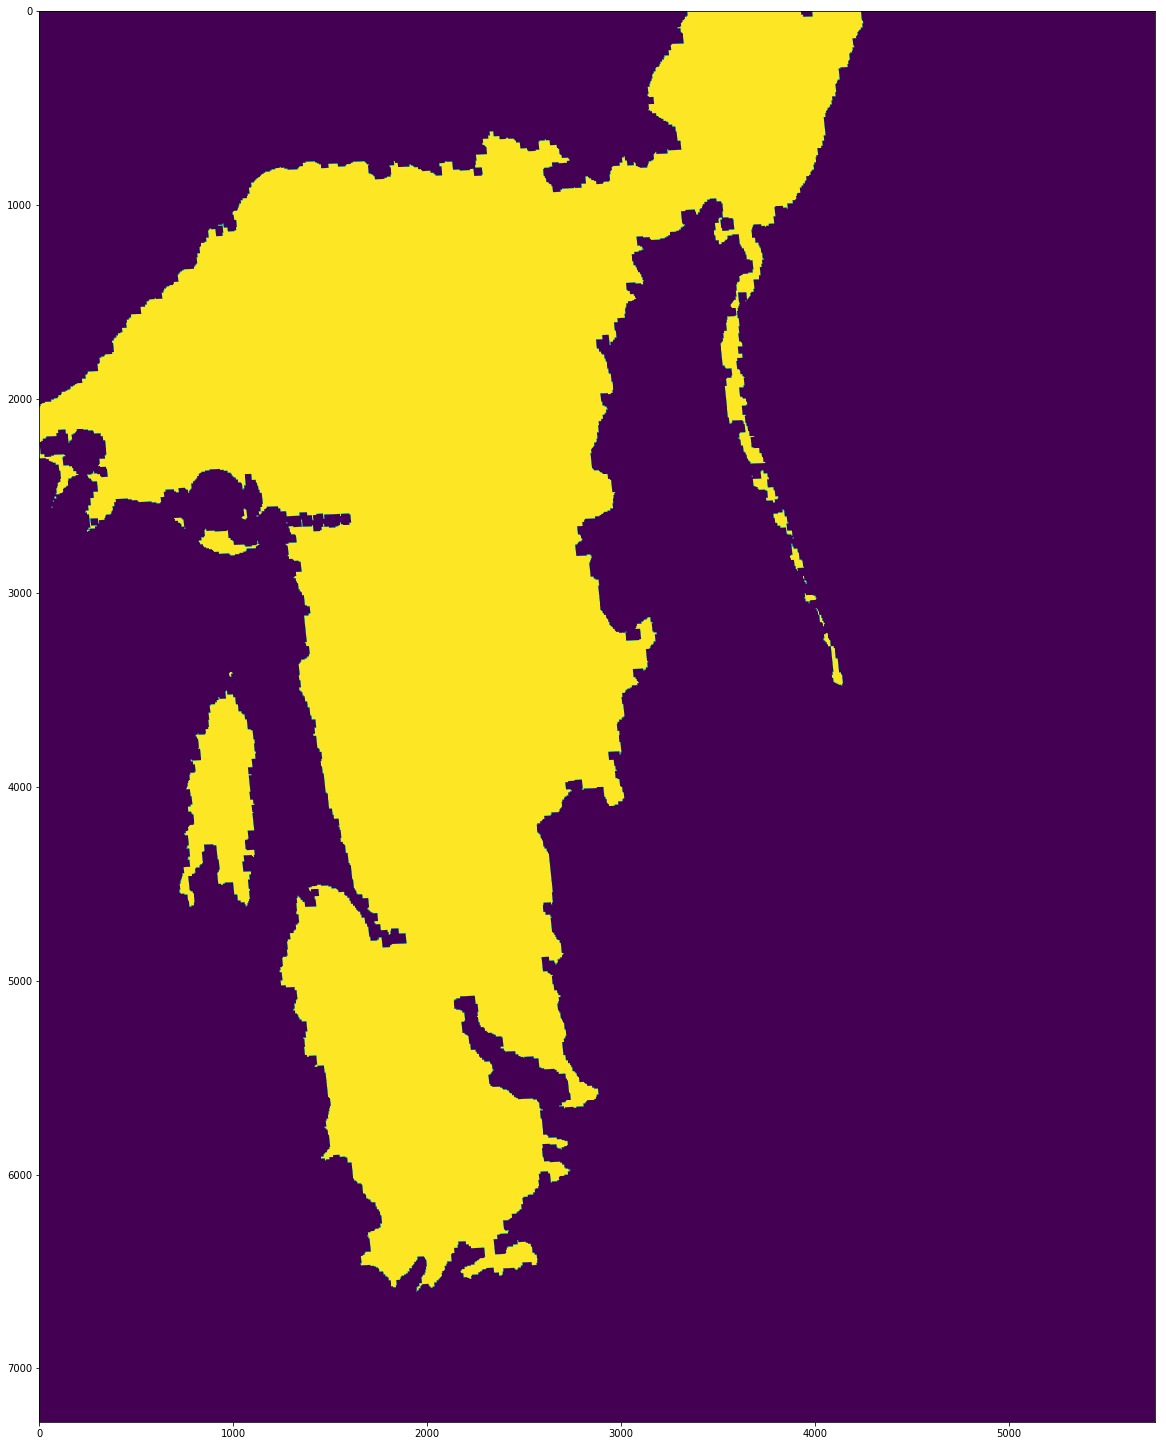

In [153]:
plt.figure(figsize=(20, 50))
plt.imshow(mask_transformed)

In [161]:
mask_layer = cv2.cvtColor(mask_transformed.astype(np.float32), cv2.COLOR_GRAY2RGB) * np.array([0, 0, 1], dtype=np.float32)
blue_layer = mask_layer.astype(np.float32)

result = cv2.addWeighted(blue_layer, 0.5, layer, 0.5, gamma=0)

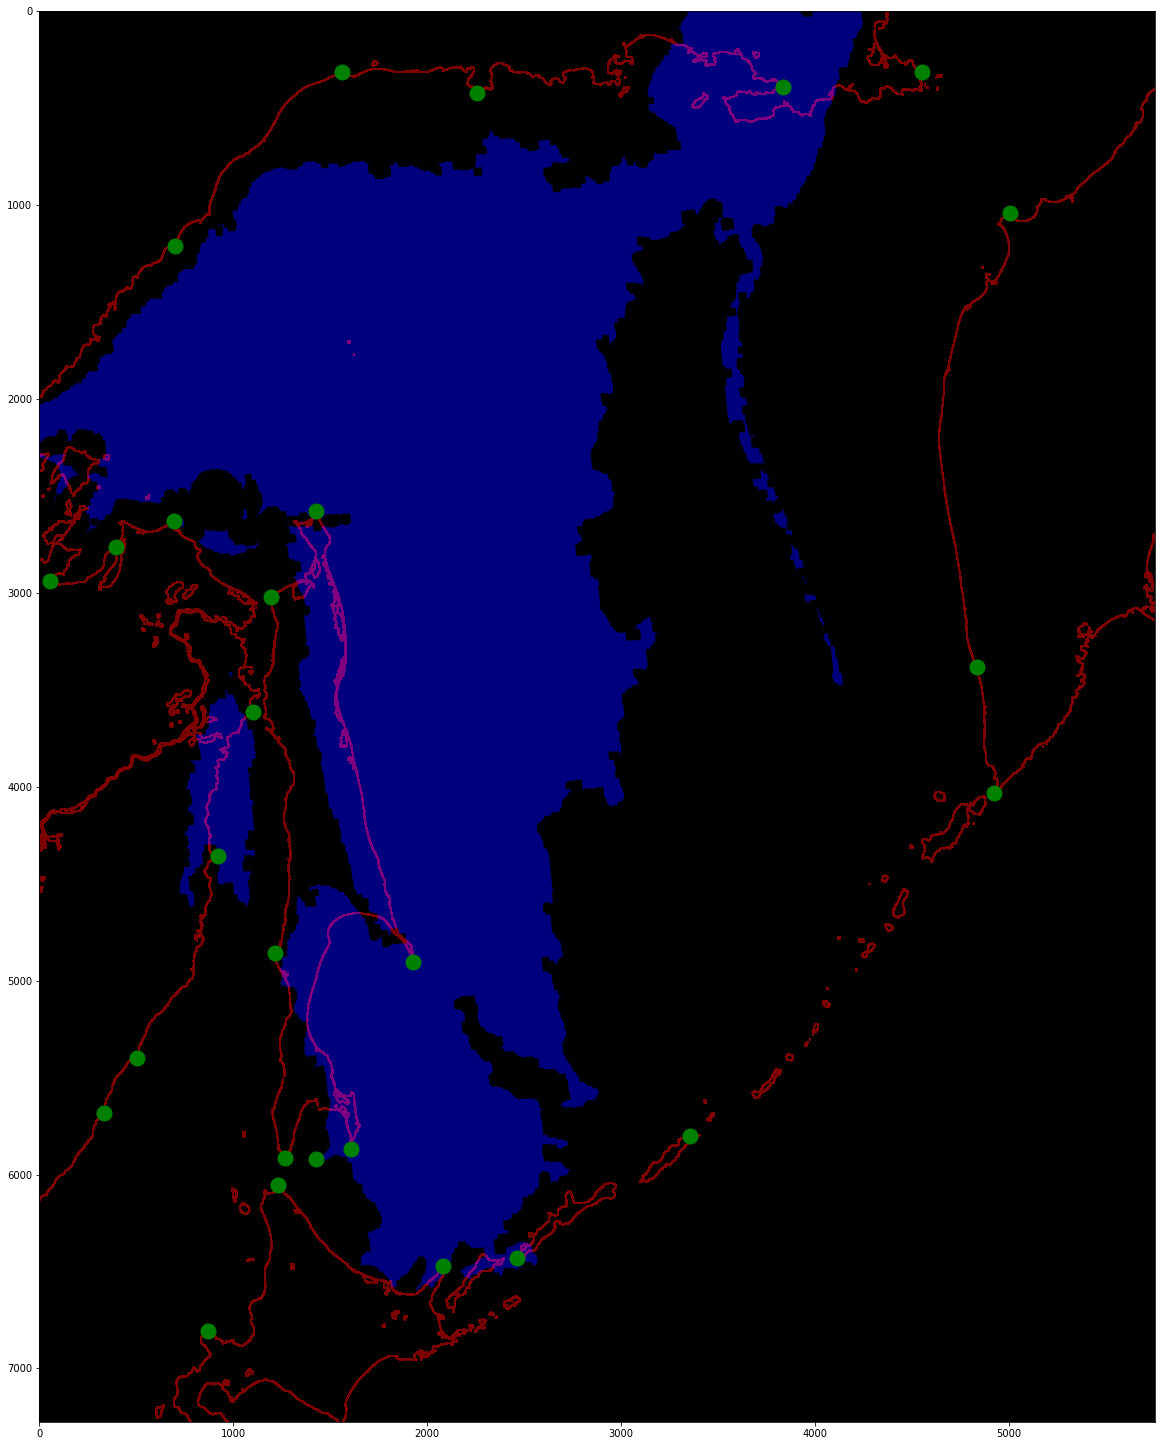

In [170]:
plt.figure(figsize=(20, 50))
pts2 = np.array(pointset_2)
plt.imshow(result)
plt.plot(pts2[:, 0], pts2[:, 1], 'go', ms=15, mfc='g', linewidth=4)